In [1]:
##!!!!!!!!Works with python 3.8, numpy 1.20.1 or 1.19.2 or 1.16.2 (this) and nbeats-forecast 1.3.7!!!!!!!!!!!
import os
import numpy as np
import pandas as pd
from torch import optim
import matplotlib.pyplot as plt
from nbeats_forecast import NBeats
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Load data
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL_NBeats_Noise.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
data = pd.read_csv(os.path.basename(file))
data = data.values        #univariate time series data of shape nx1 (numpy array)

In [3]:
#Default Setting
model = NBeats(data=data, period_to_forecast=194, train_percent=0.75,
               backcast_length=25, thetas_dims=[2,8], nb_blocks_per_stack=3, hidden_layer_units=128)
model.fit(epoch=200, verbose=0, optimiser=optim.AdamW(model.parameters,
            lr=0.05, weight_decay=0.1, amsgrad=False))
forecast = model.predict()

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=2, backcast_length=25, forecast_length=194, share_thetas=False) at @2467675900992
     | -- GenericBlock(units=128, thetas_dim=2, backcast_length=25, forecast_length=194, share_thetas=False) at @2467675901520
     | -- GenericBlock(units=128, thetas_dim=2, backcast_length=25, forecast_length=194, share_thetas=False) at @2467675901232
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=194, share_thetas=False) at @2467675900224
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=194, share_thetas=False) at @2467676131920
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=194, share_thetas=False) at @2467676132400


In [4]:
y_test = data[-194:, :]
#print(y_test)
rmse = mean_squared_error(y_test, forecast , squared=False)
mae = mean_absolute_error(y_test, forecast)
print("Rmse:" + str(rmse))
print("Mae: " + str(mae))

Rmse:1097.7072487365485
Mae: 841.9125573856314


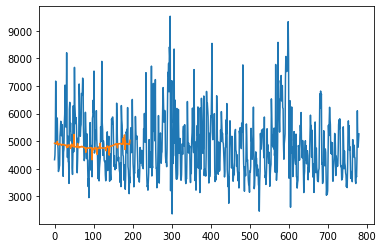

In [5]:
plt.plot(data)
#
plt.plot(forecast)
plt.show()

In [7]:
out = np.array(forecast, dtype=int)
out.round()
print(out)
np.savetxt(r"C:\Users\gurpr\Videos\BetaSci\NBeats_noise_841_1097.csv", out, delimiter=",", fmt='%.0i')

[[4927]
 [4923]
 [4915]
 [4908]
 [4906]
 [4905]
 [4904]
 [4990]
 [4897]
 [4895]
 [4855]
 [4894]
 [4894]
 [4894]
 [4885]
 [4891]
 [4881]
 [4877]
 [4846]
 [4879]
 [4881]
 [4880]
 [4878]
 [4879]
 [4874]
 [4853]
 [4870]
 [4858]
 [4851]
 [4850]
 [4847]
 [4765]
 [4850]
 [4847]
 [4776]
 [4845]
 [4866]
 [4853]
 [4852]
 [4855]
 [4850]
 [4737]
 [4841]
 [4836]
 [4894]
 [4825]
 [4821]
 [4819]
 [4814]
 [4785]
 [5244]
 [4803]
 [4801]
 [4802]
 [4795]
 [4788]
 [4784]
 [4782]
 [4781]
 [4914]
 [4761]
 [4787]
 [4791]
 [4789]
 [4763]
 [4799]
 [4800]
 [4795]
 [4792]
 [4798]
 [4815]
 [4791]
 [4793]
 [4783]
 [4784]
 [4779]
 [4776]
 [4754]
 [4765]
 [4760]
 [4592]
 [4713]
 [4746]
 [4744]
 [4737]
 [4754]
 [4744]
 [4750]
 [4752]
 [4753]
 [4751]
 [4758]
 [4759]
 [4762]
 [4759]
 [4755]
 [4324]
 [4740]
 [4735]
 [4735]
 [4688]
 [4708]
 [4734]
 [4734]
 [4771]
 [4735]
 [4736]
 [4735]
 [4751]
 [4523]
 [4734]
 [4737]
 [4741]
 [4744]
 [4736]
 [4743]
 [4917]
 [4727]
 [4750]
 [4751]
 [4754]
 [4753]
 [4754]
 [4756]
 [4750]
